# 개요 

참여중인 딥러닝 스터디 5주차 기록입니다.

# 4주차 과제정리

```python
# MNIST Data Load
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape, y_train.shape, y_train[0])
>>> (60000, 28, 28) (60000,) 5

x_train = x_train.reshape((60000,28,28,1))
```
* 위 코드와 같이 reshape 하는 이유
  * 이미지 처리의 코드는 기본적으로 3차원이 들어오게 되어있음
    * 관례적으로 앞의 샘플(60000)은 제외(표기생략)하고 뒤에 있는 부분(28,28)을 사용하는데, 2차원임
    * reshape로 (28,28,1)과 같이 통상의 이미지를 처리하는 형식으로 만들어줌
<br><br>
* CNN은 2개의 단계로 진행 (Feature Learning + Classification)
  * **Feature Learning**
    ```python
      # Step 1. Feature Learning
      model = Sequential()

      # output size formula: { (N - F + 2P) / stride } +1
      # parameter formual: K(F^2 * C + 1)

      # filter number: 32, filter_size = 3x3, (default) stride = 1, padding = 'valid' (= no padding)
      model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)))
      # output shape = {(28-3)/1} +1 = 26 => feature map = 26 x 26 x 32

      # pool_size = 2x2, stride = None, padding = "valid" (= no padding)
      model.add(MaxPooling2D((2,2)))
      # output shape = 26/2 = 13 => feature map = 13 x 13 x 32

      model.add(Conv2D(64, (3,3), activation = "relu"))
      # output shape = {(13-3)/1} +1 = 11 => feature map = 11 x 11 x 64

      model.add(MaxPooling2D((2,2)))
      # output shape = 11/2 = 5,5 => 5 => feature map = 5 x 5 x 64

      model.add(Conv2D(64, (3,3), activation = "relu"))
      # output shape = {(5-3)/1} +1 = 3 x 3 x 64
    ```
  * **Classification**
    ```python
      # Step 2. Fully Conneted Layer
      model.add(Flatten())
      model.add(Dense(64, activation = "relu"))
      model.add(Dense(10, activation = "softmax"))
    ```
    * Multiclass문제에는 Output Activation function을 Softmax로 한다
<br><br>
```python
# model compile: cost function, optimizer, metric 설정
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# Training
history = model.fit(x_train, y_train, epochs=5)
>>>Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1554 - accuracy: 0.9520
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9926
```
* 지난번 ANN 등 보다 좋은 정확도나온 이유(기존ML 등 대비)
  * 파라미터의 수가 늘어나, 비선형적 관계를 많이 표현가능해짐
    * (CNN을 쓰며)지난번보다 Layer를 깊게(많이) 만듦
    * 뉴런의 수 증가
  * 하이퍼 파라미터 조정(Relu사용 등)
  * Adam Optimizer의 사용

```python
  # Prediction example
  predictions = model.predict(x_test)

  print(predictions[0])
  print(np.argmax(predictions[0]))
  print(y_test[0])

  >>> [1.3171346e-07 2.3666507e-08 5.0742160e-06 8.5065667e-06 9.7597770e-08
 5.1097163e-07 6.6373372e-11 9.9998188e-01 1.0004998e-06 2.8241509e-06]
```
* 위 코드의 predictions[0]의 10개값
  * Softmax로 도출된, 0~9 중 어떤 값에 속할 지에 대한 확률

* GPU로 모델을 돌리는 방법
  * 실습 중인 경우는 GPU가 필요할 정돈 아니지만, 보통의 프로젝트는 GPU사용이 필수적
    * `with tf.device('/device:GPU:0')`
  ```python
    with tf.device('/device:GPU:0'):
      # Feature Learning
      model = Sequential()
      model.add(Conv2D(32, (3,3), input_shape = (28,28,1)))
      model.add(MaxPooling2D((2,2)))
      model.add(Conv2D(64, (3,3)))
      model.add(MaxPooling2D((2,2)))
      model.add(Conv2D(64, (3,3)))
      # Fully Conneted Layer
      model.add(Flatten())
      model.add(Dense(64, activation = "relu"))
      model.add(Dense(10, activation = "softmax"))
      model.summary()
      # model compile: cost function, optimizer, metric 설정
      model.compile(optimizer="adam",
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])
      # Training
      history = model.fit(x_train, y_train, epochs=5)
  ```

# 5주차 수업정리

## `Hyper parameter(하이퍼 파라미터)`
* 위 과제에서의 성능향상은, CNN의 적용(계산량의 감소)보다는, 하이퍼 파라미터조정에서 기인함
* 하이퍼 파라미터 : 사람이 정해주는 레이어 갯수, 뉴런의 갯수 등
<br><br>

### (1) `Activation functions` : Sigmoid, tanh, ReLU 등
* 비선형성을 부여하기 위해 사용. 어떤 것을 쓰냐에 따라 Neural Network성능에 큰 영향
* Activation functions의 종류 
  * `Sigmoid` : 0~1 출력. Logistic regression 등 오래부터 쓰였던 함수.
    * 0~1 사이이기 때문에 확률적 해석이 가능
    * 문제
      * `Killing Gradient` : 가장 치명적 문제. **미분값이 0이 되는 구간은 학습이 일어나지 않음**
      * `Output not Zero-centered` : 치명적 문제. **학습은 되지만, 레이어를 통과할 때마다 왜곡 심화(같은 방향으로만 학습)**
        * SGD에서는 Batch-size 반복마다 일종의 자정작용이 있어 약간 완화되기는 함
      * Computationally expensive : 학습이 안될 정도의 큰 문제는 아님. Exponential계산 등 계산량이 많음
  * `tanh` : -1~1 출력. 
    * Zero-centered이므로 왜곡이 일어나지는 않음
    * 문제 : 여전히 `Killing Gradient`문제가 존재하여 Neural Network에서 쓰기는 부적절
  * `ReLU`(Rectified Linear Unit) : 음수면 0, 양수면 그대로
    * Computationaliy very efficient(음수면 0반환)
    * `Killing Gradient`문제는 없음. 기울기가 0인 지점이 없으므로(단 0인 부분은 미분이 되지 않음)
    * 문제
      * `Output not Zero-centered`(Batch-size 적용시 큰 문제가 되진 않음)
      * 0인 부분은 미분이 되지 않음(0인 경우는 미분값 지정하는 방법으로 해결 가능)
      * `Dead ReLU` : 한번 0이되면, Layer가 계속 되어도 기울기가 업데이트 되지 않고 0
  * `Leaky ReLU`(Rectified Linear Unit) <br>
    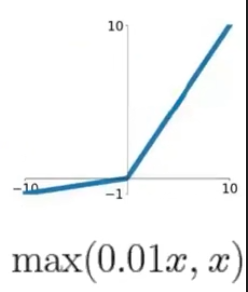
    * 음수인 경우 0이 아닌 0.01$x$를 적용하여Dead ReLU문제 해결 가능
    * 효율적인 계산이나 Sigmoid/Tanh대비 빠른 장점 등 ReLU의 장점 존재
    * 문제 : additional paremeter(0.01$x$)를 계산해야해서 계산량이 늘어나기는 함
  * `ELU`(Exponential Linear Unit) : 
    * 기존처럼 인위적인 지정(구간별 미분값 등)없이, 모든 지점에서 자연스럽게 미분이 가능하도록 Exponential 적용
    * 문제 : 계산량이 늘어남
      * Exponential연산은 nvidia환경에서 지원이 되는 편이긴 함
* `Activation function의 적용`
  * **기본적으로는 ReLU를 사용**. Dead ReLU문제가 있긴하지만 일반적인 프로젝트 수준에서는 무방
  * 단 Computation자원이 충분하다면 Leaky ReLU나 ELU 사용 가능
  * **Sigmoid나 Tanh는 Hidden layer의 Activation function으로 사용X**(Killing Gradient문제로 학습되지 않음)
  * 참고 : GPT계열 등 대규모 모델은 ReLU계열이나 GELU(ELU를 Gausssian으로 바꾼)
        
### (2) `Weight Initialization`
* Gradient Descent에서 임의의 점에서 시작했었던 것과 달리, 좋은 시작지점에서 시작하고자 하는 것

* 임의의 크거나 작은 Weight로 시작하는 경우와 문제
  * `Small Gaussian Random` : 작은 Weight로 시작한 경우
    * Layer를 통과할때마다 한 곳으로 수렴(0으로 수렴)되어 학습이 되지 않음
      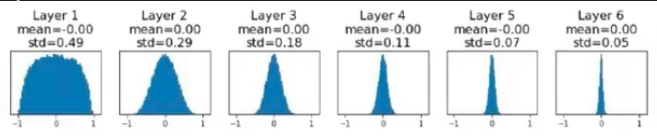
  * `Large  Gaussian Random` : 큰 Weight로 시작한 경우
    * Layer를 통과할때마다 양쪽으로 발산(1,-1로 수렴)되어 학습이 되지 않음
      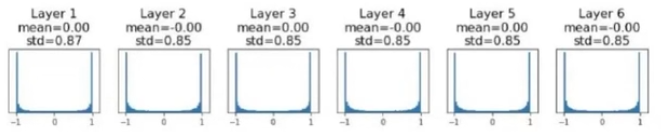
  * ReLU를 적용하더라도 위와 비슷한 문제는 발생

* `Xavier Initialization` : Input dimension에 루트를 씌운 것으로 나눠 준 Weight 사용 (64차원이라면 8로 나눔)
  * Input variance와 Output variance 맞춰 좋은 시작점(Weight)에서 시작
  * Layer를 여러번 통과해도 Robust한 정규분포 모양으로 나오게 됨 <br>
    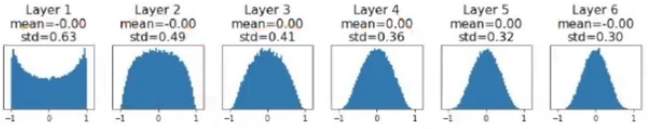

* `Kaiming/MSRA Initialization for ReLU` : 2/Input dimension 을 루트 씌운 것으로 나눈 Weight 사용

## `Learning rate Scheduling`
* 어떤 Learning rate가 가장 좋은가? <br>
  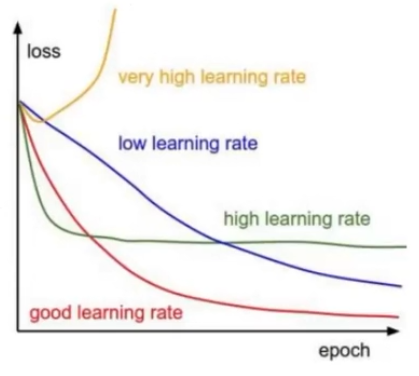
  * Very high : 이동이 너무 커서 Loss가 급격히 상승
  * Low : 이동이 너무 작아서 오래걸림
  * High : 처음엔 적절한 rate보다도 학습이 빠르지만, 일정 수준부터 Loss감소가 없음
  * **적절한 rate를 통해, 적절한 속도로 optimum point로 도달하도록 해야함**
* `Learning rate Scheduling(Decay)`의 구상
  * High(빠름) → Good(적절) → Low 의 rate를 적용하면 되지 않는지에 대한 의문으로 시작
  * Epoch에 따라 learning rate를 조절하여 효율적인 학습속도 구현 **(↔ constant learning rate)**
    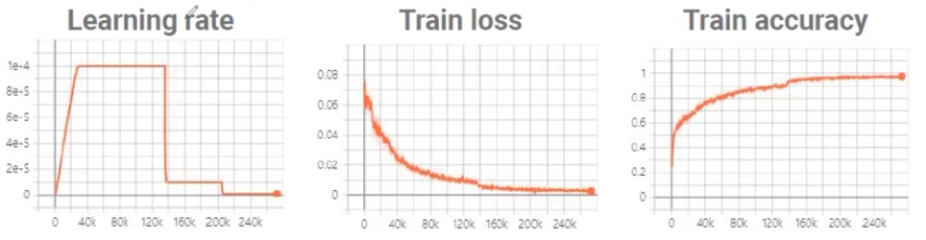
  * 모든 프로젝트에 직관을 적용한 Scheduling은 어려우며, 모든 프로젝트에 적용가능한 Scheduling은 없음.
    * 정해진 Scheduling은방식(Cosine, Linear, Inverse Sqrt 등)이 존재

### (1) `Learning rate Scheduling의 종류`
* 크게 3가지 종류가 있음
  * `Linear Learning rate` : [세심하게 학습] 가장 기본적. Epoch을 거듭할수록 rate 감소
  * `Cosine Learning rate` : [빠른 학습] High rate를 좀 더 오래 유지 
  * `Inverse Sqrt rate` : [무난하게 학습] rate를 빠르게 감소시킴. Optimal Point를 세밀하게 찾고 싶을 때 사용

* 분야마다 많이 사용되는 방법은 다름
  * 자연어처리는 큰 모델을 다루고 학습데이터가 많은 편이므로 `Cosine Learning rate Scheduler` 사용
  * 작은 문제나 모델이라면 `Linear/Inverse Sqrt earning rate Scheduler` 고려 가능

* `Learning rate Warm-up`?
  * 눈으로 Loss 등을 보며 감을 잡는 구간
    * Loss가 엄청 높게 튀는 경우 Learning rate가 높으므로 낮춤 

### (2) 기타 참고사항
  * Hyper parameter가 적용되는 부분
    * Activation function은 레이어마다 적용
    * Learning rate epoch마다 적용
    * Weight Initialization은 처음에만 적용
  * 대략적인 가이드라인
    * 레이어나 뉴런의 수는 가이드라인이 없는 편 (실험해보며 조정)
      * 레이어의 수가 많을수록 복잡한/비선형적인 관계를 표현 가능
      * 레이어의 수가 30개가 좋은지 50개가 좋은진 알 수 없음
    * Learning rate는 특정 값이 높거나 낮다고 볼 수 없음 (실험해보며 조정)
      * Loss값이 너무 튀면 learning rate를 먼저 조정 (대부분 말도안되게 튀는 것은 learning rate문제)
  * 우선순위 : (loss가 튐)Learning rate 조정 → Optimizer

## `Regularization for Overfitting`

### (1) Overfitting
* 새로운 데이터에 대해서는 잘 동작하지 않음 (↔Underfitting. 학습한 데이터도 처리하지 못함. 과거의 전통적 머신러닝[모델의 한계 등])
* 파라미터의 갯수가 늘어나고 복잡해지는 경우 많음

### (2) Regularization
* 파라미터가 커질수록 오차도 커짐 → 파라미터가 커져 Overfitting이 일어나는 것을 방지
* 람다($\lambda$)의 크기로 패널티의 크기를 설정. 커질수록 하단 Boundary(L2는 원형, L1은 마름모)는 작아짐
* 기존의 최적화 지점(Parameter제약 없을 때)에서 그래프의 화살표 방향(Boundary안)으로 이동

#### `Ridge Regression(L2 Norm)`
* 기존의 오차정의(MSE 등)에, Penalty term으로 `파라미터를 제곱해서 더함`<br>
  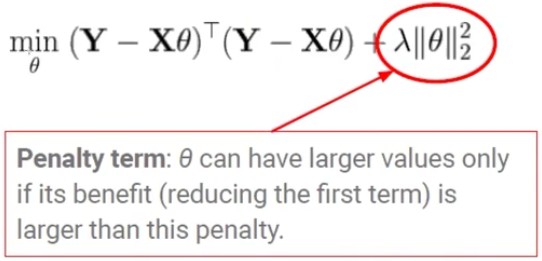
  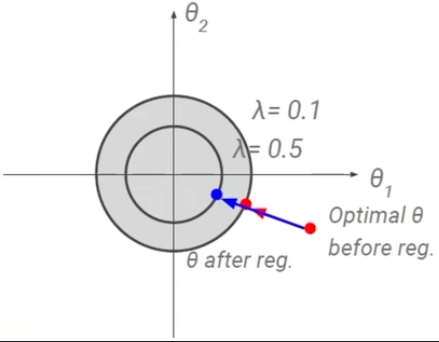

#### `Lasso Regression(L1 Norm)`
* 기존의 오차정의(MSE 등)에, Penalty term으로 `파라미터를 절대값으로 더함`<br>
(`Ridge와의 차이점 : 필요없는 파라미터를 삭제해줌`)<br>
  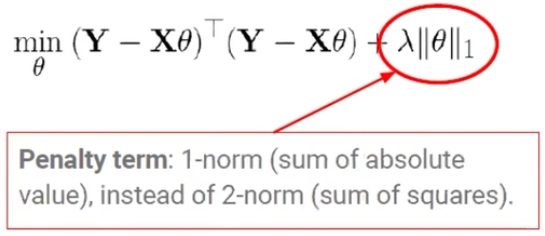
  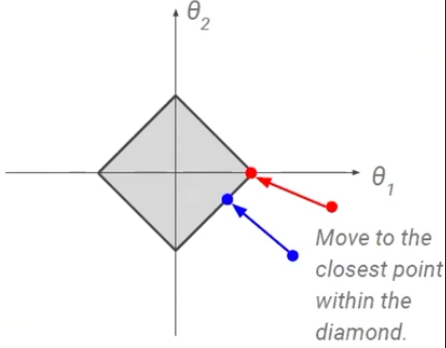

### (3) Regularization for Deep Nueral Networks

#### `Weight decay`
* Ridge(L1, 제곱, 원형마름모Boundary), Lasso(L2, 절대값, 마름모Boundary)의 적용
* Multiple regression 등 과거엔 많이 쓰였지만 `딥러닝에선 잘 안쓰임`

#### `Early stopping`
* Train set에서 `Validation set을 분리`해두고, `Validation점수가 높아질때까지(Loss저하) 학습`
  * Test loss가 Overfitting지점부터 발생하는 점을 참고
*  Acuraccy와 같은 Metric으로 적용하는 것이 트렌드
  * Loss는 미분가능 & 작을수록 좋은 지표 등을 이유로 채택했지만 실제 알고싶은 것은 Loss가 아닌 Accuracy임
  * F1-score 등은 미분 불가로 적용 불가했지만, 측정 목적이라면 Accuracy를 채택
* 단점 : 측정을 위한 Validation set을 만들기 위해 데이터가 많이 필요(데이터가 적은 바이오분야 등은 적용 어려움)
  * 다만 딥러닝은 보통 데이터가 많은 경우에 사용하므로 Early stopping 적용이 가능함 
* 주의점 : Train/Validation/Test로 나눌 때, `Test Set은 정한 뒤엔 건드리지 않는다`
  (Train set에서 나눈 Train set와 Validation set의 비율 조절은 가능하다)
* Final metric으로 사용된다

#### `Drop out`
* `Random한 뉴런을 끈다`
* 다소 무식하지만 효과가 좋아 잘 사용됨(GPT 등에서도 활용)
  * 예시) 고양이의 눈/귀/코를 특징으로 잡을 때, 호랑이의 눈이 들어온다면 오류가 발생할 수 있는데,<br> 
  눈에 대한 특징(뉴런)이 꺼져있다면 오류를 방지할 수도 있다
* Cut out(Drop out의 응용) : 사진에서 특정 부분을 Random하게 삭제하여 입력하여 판단시키는 방법으로 Overfitting극복
* Large fully-connected layers에 사용 

## `Optimization`

* SGD : 전체 데이터를 다 넣기 어려워 Batch를 적용해 극복

### (1) SGD의 문제
* `Jittering문제` : 원하는 것은 전체 파라미터의 최적화지만, 특정 파라미터만 학습이 진행됨
  * 예를 들어 자산&월급이 있을 때, 값이 큰 자산 위주로 최적화가 진행됨
  * Singular value가 큰 쪽으로 학습이 이루어짐
* `Local optimum문제` : 전체의 최적이 아닌, 부분의 최적인 Local Optimum에 빠지는 문제
  * 다만, 딥러닝에서는 거의 일어나지 않는 문제임. 모든 파라미터 대부분이 양수거나 음수인 특수한 상황에서 발생
* `Saddle points문제` : 말의 안장같이 생겨, 극소인 동시에 극대인 지점이 발생. `학습이 이루어지지 않는 문제`
  * 오히려 Saddle point문제가 딥러닝에서는 더 많이 발생 (미분값이 여러개의 양수/음수가 섞임)
* `Inaccurate Gradient Estimation문제` 
  * 어느정도까지는(~50% 정도) Batch size가 클수록 성능향상이 있음
    * 장비(메모리)가 유효하게 많을때만 가능한 방법으로, 잘 갖춰진 환경에서만 적용 가능함(Google의 연구논문이었음)
      * 즉 현실적으로는 Batch size 확대는 적용이 어려운 점이 있음 
    * 82.76~83% 구간의 변화로, Practical하게 유의미한 결과로 보긴 어려움(Academic한 측면에서 유의미)
  * `적용Insignt` : 나에게 1만개의 데이터가 있을 때, 5천 건 정도의 Size(2의 배수인 4096으로) 적용

### (2) SGD의 문제들에 대한 해결방법
* `SGD + Momentum (Saddle Points문제 해결)`
  * 현실과 달리 GD의 적용시에는 관성이 없으므로 Saddle point에서 멈추게 되므로, 관성을 주어 해결
    * Local minimum에서는 적용 불가. saddle point형태이기에 가능한 방법<br>
      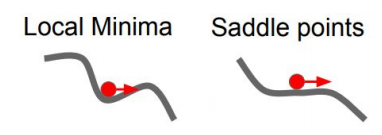
* `AdaGrad[AdaptiveGrad] (Jittering문제 해결)`
  * Scale이 달라 발생하는 문제이므로, Scaling을 해주어 맞춰줌
* `RMSProp [Leaky AdaGrad] (AdaGrad문제 해결)`
  * AdaGrad가 나누기를 반복하다보니 분모가 커져 0에 수렴하는 문제를 해결
  * 현재의 비율과 과거의 비율을 조절해 분모가 너무 커지는 것을 방지
  * AdaGrad의 Scaling개념을 이해하며 사용하는 것이 중요
* **`Adam`**
  * RMSProp + SGD with Momentum
* First vs Second order Optimization : 실전적으로 잘 쓰이지 않음
  * 역행렬이 있다는 점에서 계산량이 많아 쓰기 어렵다는 직관적 이해 정도 갖기

## `Batch Normalization`

### Data Preprocessing (Nomalization)
* 통상적으로 Zero-centering, Scaling 두가지를 해 줌
* Layer를 통과할 때마다 왜곡이 커지는 문제를 방지 
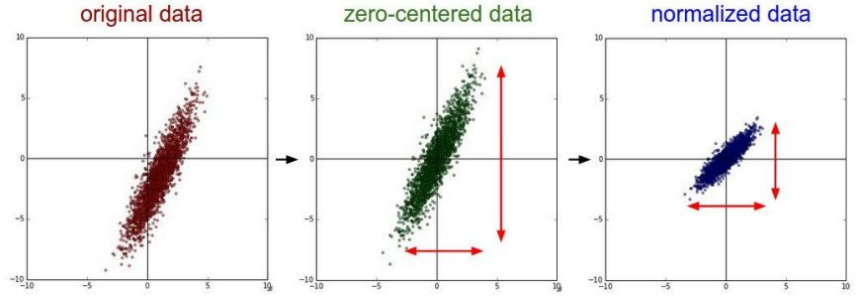
  * Zero-centering : 중심에서 점점 멀어지는 문제 해결 (평균을 뺀다)
  * Scaling : 분포가 점점 길어지는 문제 해결 (표준편차 등 특정 숫자로 나눠 준다)
* 일반적인 ML은 처음에 전처리를 하면 되지만, DL은 레이어를 통과하며 다시 왜곡이 심해질 수 있음
  * 왜곡을 막기 위해 레이어 통과마다 반복하는 `Batch Normalization`을 진행

### Batch Normalization
* 레이어를 통과할 대마다 Zero-centering, Scaling을 해줌
* Drop-out과 함께 많이 사용됨
* 적용은 
  * Activation function 적용하기 전에
  * Fully-connected layer 통과한 다음에 

### Batch Normalization의 종류
* Batch / Layer / Instance / Group Normalization
* 기본적으로는 대부분은 Batch Normalization을 많이 사용(특히 이미지)
* 자연어 처리는 Layer Normalization을 사용